In [58]:
import numpy as np
import matplotlib.pyplot as plt

## Algorytm wyżarzania symulowanego

In [60]:
def simulated_annealing(f, x, d=0.2, t0=10, a=0.99, max_iter=100):
    n = len(x)
    x_opt = x
    f_opt = f(x)
    x_hist = np.zeros((max_iter, n))
    f_hist = np.zeros(max_iter)
    Ak = np.zeros(max_iter)
    tk = np.zeros(max_iter)
    
    x_hist[0, :] = x
    f_hist[0] = f(x)
    tk[0] = t0
    
    for k in range(1, max_iter):
        #np.random.seed(42)
        xc = x + np.random.uniform(-d, d, size=n)
        Ak[k] = min(1, np.exp(-(f(xc) - f(x)) / tk[k-1]))
        
        if np.random.uniform() < Ak[k]:
            x = xc
            if f(x) < f_opt:
                x_opt = x
                f_opt = f(x)
                
        x_hist[k, :] = x
        f_hist[k] = f(x)
        tk[k] = tk[k-1] * a
    
    return {'x_opt': x_opt, 'f_opt': f_opt, 'x_hist': x_hist, 'f_hist': f_hist, 'Ak': Ak, 'tk': tk}

Dla porównania - Algorytm spadku gradientowego

In [61]:
def num_grad(f, x, h=1e-6):
    n = len(x)
    g = np.zeros(n)
    for i in range(n):
        e_i = np.zeros(n)
        e_i[i] = 1
        g[i] = (f(x + e_i * h) - f(x - e_i * h)) / (2 * h)
    return g

def grad_descent(f, x, a=0.2, max_iter=100):
    n = len(x)
    x_opt = x
    f_opt = f(x)
    x_hist = np.zeros((max_iter, n))
    f_hist = np.zeros(max_iter)
    x_hist[0] = x
    f_hist[0] = f(x)
    for k in range(1, max_iter):
        x = x - a * num_grad(f, x)
        x_hist[k] = x
        f_val = f(x)
        f_hist[k] = f_val
        if f_val < f_opt:
            x_opt = x
            f_opt = f_val
    return {'x_opt': x_opt, 'f_opt': f_opt, 'x_hist': x_hist, 'f_hist': f_hist}

## Przykład użycia 1

In [62]:
def my_fun(x): #definicja funkcji
    return np.sum(x**2)

x0 = np.array([5, 5]) #punkt startowy

Najlepsze znalezione rozwiązanie: [3.12578154 3.80242302]
Wartość funkcji celu dla najlepszego rozwiązania: 24.22893105197977


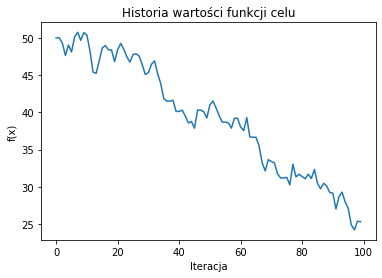

In [68]:
max_iter = 100
results_sa = simulated_annealing(my_fun, x0, d=0.2, t0=10, a=0.99, max_iter=max_iter)

print("Najlepsze znalezione rozwiązanie:", results_sa['x_opt'])
print("Wartość funkcji celu dla najlepszego rozwiązania:", results_sa['f_opt'])

# Historia wartości funkcji celu
import matplotlib.pyplot as plt
plt.plot(results_sa['f_hist'])
plt.title('Historia wartości funkcji celu')
plt.xlabel('Iteracja')
plt.ylabel('f(x)')
plt.show()

## Przykład użycia 2

In [69]:
def my_fun(x): #definicja funkcji
    return 0.5 + (np.sin(x[0]**2 - x[1]**2)**2 - 0.5) / (1 + 0.001*(x[0]**2 + x[1]**2))**2

x0 = np.array([3, 4]) #punkt startowy

Najlepsze znalezione rozwiązanie: [2.98924303 2.99223933]
Wartość funkcji celu dla najlepszego rozwiązania: 0.017730226374175928


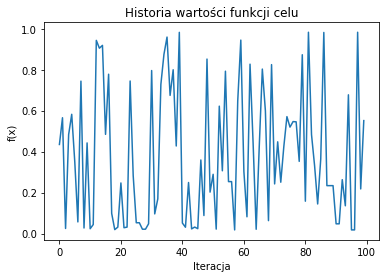

In [76]:
max_iter = 100
results_sa = simulated_annealing(my_fun, x0, d=0.2, t0=10, a=0.99, max_iter=max_iter)

print("Najlepsze znalezione rozwiązanie:", results_sa['x_opt'])
print("Wartość funkcji celu dla najlepszego rozwiązania:", results_sa['f_opt'])

# Historia wartości funkcji celu
import matplotlib.pyplot as plt
plt.plot(results_sa['f_hist'])
plt.title('Historia wartości funkcji celu')
plt.xlabel('Iteracja')
plt.ylabel('f(x)')
plt.show()

In [77]:
n_grid = 100
x_seq = np.linspace(-4, 4, n_grid)
f_mat = np.zeros((n_grid, n_grid))
for i in range(n_grid):
    for j in range(n_grid):
        f_mat[i, j] = my_fun([x_seq[i], x_seq[j]])

In [78]:
results_gd = grad_descent(my_fun, x0, a=0.1, max_iter=max_iter) 

Porównanie algorytmów

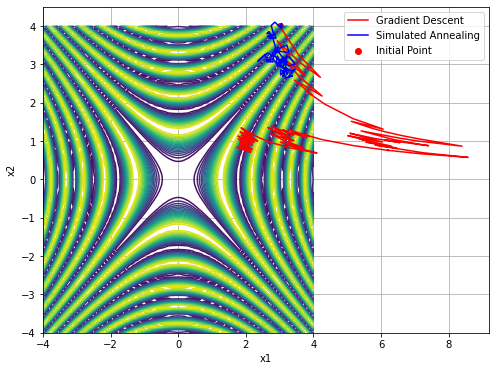

In [80]:
plt.figure(figsize=(8, 6))
plt.contour(x_seq, x_seq, f_mat, levels=20)
plt.plot(results_gd['x_hist'][:, 0], results_gd['x_hist'][:, 1], color='red', label='Gradient Descent')
plt.plot(results_sa['x_hist'][:, 0], results_sa['x_hist'][:, 1], color='blue', label='Simulated Annealing')
plt.scatter(x0[0], x0[1], color='red', marker='o', label='Initial Point')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

Prawdopodobieństwo akceptacji

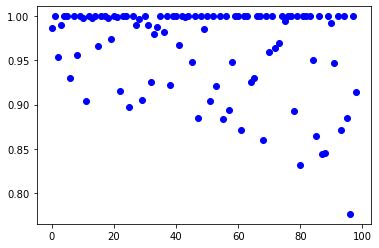

In [81]:
plt.scatter(list(range(max_iter-1)), results_sa['Ak'][1:], color='blue')
plt.show()